# Choosing feedback parameters

---
## Finding parameters

Thanks to a simplified simulation, $r$ will be deduced so as to compute $\lambda_1$ and $\lambda_2$. Similarly, $\delta$ and $\nu$ will be estimated so as to use their value in the command law.


In this basic model, we assume that the float is only subjected to its weight and its Archimedean buoyant force :

$$
\begin{align}
m (1+a) \frac{dv_f}{dt} &= \frac{\rho_w -\rho_f}{\rho_f}~g
\end{align}
$$

It can be simplified as : 

$$
\begin{align}
m (1+a) \frac{dv_f}{dt} &= (\rho_w (V+v) - m)~g
\end{align}
$$

where $g$ is the acceleration of gravity, $v_f$ is the downward velocity, $\rho_f$ is the float density (assumed to be constant here as low variations of pressure and temperature are supposed), $m$ its mass, $a$ its added mass, $\rho_w$ the water density, $V$ the bulk of the float volume that may be affected by pressure and temperature and $v$ is the volume taken in and out by the pump/piston, v is supposed to depend on the time and to be shaped like $ut$ where u is the piston flow (the piston is supposed to leave the cylinder of the float with a constant velocity $u$)

At the equilibrium (t=0), the float is supposed to be motionless, that is to say the weight of the float and its Archimedean buoyant force associated to the volume V balance each other out, hence :

$$
\begin{align}
m (1+a) \frac{dv_f}{dt} &= \rho_w v~g \\ 
m (1+a) \frac{dv_f}{dt} &= \rho_w u t ~g
\end{align}
$$



Integration this equation twice allows to the velocity ($v_f$) and the depth ($z_f$) of the float as functions of the time with the following initial conditions :

$$
\left\{
    \begin{array}{ll}
              t = 0 : v_f (0) = 0 \\
              t = 0 : z_f (0) = 0
    \end{array}
\right.
$$


Hence :


$$
\begin{align}
v_f (t) &= \frac{\rho_w u ~g t^{2}}{2 m (1+a)} \\
z_f (t) &= \frac{\rho_w u ~g t^{3}}{6 m (1+a)}
\end{align}
$$


To assess the time and distance parameters $r$ and $\delta$, it will be useful to create a function $t_\nu$ computing the necessary time for the float to reach a given speed $\nu$ and another function $z_\nu$ computing the necessary depth for the float to reach the same given speed $\nu$.

These functions will be :


$$
\begin{align}
t_\nu (\nu) &= \sqrt{\frac{2 m (1+a) \nu}{\rho_w u ~g}} \\
z_\nu (\nu) &= z_f(t_\nu(\nu)) &= \frac{\rho_w u ~g (\sqrt{\frac{2 m (1+a) \nu}{\rho_w u ~g}})^{3}}{6 m (1+a)}
\end{align}
$$


Now, everything is ready to estimate the parameters $r$, $\delta$ and $\nu$. 

### Estimation of $\nu$

Firstly, let's estimate $\nu$ corresponding to the typical vertical velocity the float should move at.

Reminding that : 

\begin{align}
y = x_1 - \nu \arctan{\frac{\overline{x}_2-x_2}{\delta}},
\end{align}

The choice of $y$ as law of the type $y\sim e^{-r t}$ is such that when $t\xrightarrow{}\infty$: $x_1=\nu \arctan{\frac{\overline{x}_2-x_2}{\delta}}$.


This means that the speed of the float : $x_1\xrightarrow{}0$ when $|x_2-\overline{x}_2|<\delta$. Moreover, the float vertical velocity should also never be greater that $\pm \nu \times \pi/2$: the asymptote of the curve $x_1$ as a function of $x_2-\overline{x}_2$ as it can be seen below. This is the condition to choose the parameter $\nu$.

In short: $\nu*\pi/2$ must correspond to the maximum velocity that can be reached by the float.

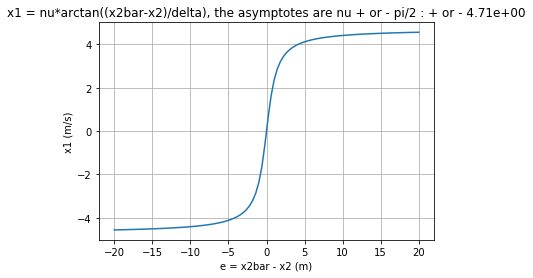

In [5]:
%matplotlib inline
#%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def x_1(e,nu):
    # e is x2bar - x2
    delta = 1
    return nu * np.arctan(e/delta)

e = np.linspace(-20,20,100)
nu = 3
fig, ax = plt.subplots()
ax.plot(e, x_1(e,nu))
ax.set_xlabel('e = x2bar - x2 (m)')
ax.set_ylabel('x1 (m/s)')
ax.set_title('x1 = nu*arctan((x2bar-x2)/delta), the asymptotes are nu + or - pi/2 : + or - {:.2e}'.format(nu*np.pi/2))
ax.grid()


### Estimation of $\delta$

$\delta$ is a length scale that defines the zone of influence around the target depth.

That is to say mathematically :

$x_1\xrightarrow{}0$ when $|x_2-\overline{x}_2|<\delta$ 

Text(1, 1, '2 x delta')

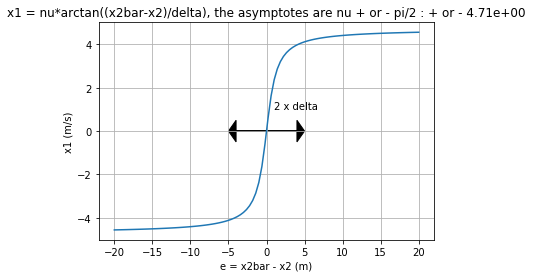

In [6]:
e = np.linspace(-20,20,100)
nu = 3
fig, ax = plt.subplots()
ax.plot(e, x_1(e,nu))
ax.set_xlabel('e = x2bar - x2 (m)')
ax.set_ylabel('x1 (m/s)')
ax.set_title('x1 = nu*arctan((x2bar-x2)/delta), the asymptotes are nu + or - pi/2 : + or - {:.2e}'.format(nu*np.pi/2))
ax.grid()
ax.arrow(-4,0,8,0,head_width=1, head_length=1, fc='k', ec='k', label = 'delta')
ax.arrow(4,0,-8,0,head_width=1, head_length=1, fc='k', ec='k')
ax.text(1,1,"2 x delta")

In short, $\delta$ corresponds to the depth traveled by the float before reaching the maximum speed $\nu*\pi/2$ from an equilibrium.
Therefore, to estimate $\delta$, we can use the previous formula which has been defined previously :

$$
\begin{align}
\delta &= z_\nu (\nu\pi/2) &= z_f(t_\nu(\nu\pi/2)) &= \frac{\rho_w u ~g (\sqrt{\frac{2 m (1+a) \nu\pi/2}{\rho_w u ~g}})^{3}}{6 m (1+a)}
\end{align}
$$

### Estimation of $r$

Similarly, $1/r$ corresponds to the necessary time for the float to reach the maximum speed $\nu*\pi/2$ from an equilibrium.

Thus, 1/r is given by :

$$
\begin{align}
t_\nu (\nu\pi/2) &= \sqrt{\frac{2 m (1+a) \nu\pi/2}{\rho_w u ~g}} \\
\end{align}
$$


## Definition of the parameters and functions


In [7]:
'''
parameters:
    g : gravity acceleration [m.s^-2]
    m : float mass [kg]
    a : float added mass [no dimension]
    r : float radius [m]
    L : float length [m]
    V : float volume [m^3] (optional)
    rho_w : water density [kg.m^3]
    omega :  current rotation rate [rad/s]
    lead : screw lead (i.e. displacement after one screw revolution) [m]
    r_piston : piston radius [m]
    u : piston flow [m^3.s^-1]
'''
def omega2dvdt(omega=12.4*2.*np.pi/60., lead=0.0175, r_piston=0.025):

    '''
    Function computing the piston flow u
    parameters:
        omega: float [rad/s]
            current rotation rate, omega=dphi/dt
            for ENSTA float, omega_max = 124.*2.*np.pi/60.,
            omega_min = 12.4*2.*np.pi/60.
        lead: float [m]
            screw lead (i.e. displacement after one screw revolution)
            d = phi/2/pi x lead
        r_piston: float [m]
            piston radius
    '''
    return omega*lead/2.*r_piston**2



In [8]:
g = 9.81 #m.s^-2
rho_w = 997 #kg.m^3

params = {'r': 0.06, 'L': 0.5, 'a': 1., 'omega' : 12.4*2.*np.pi/60., 'lead' : 0.0175, 'r_piston' : 0.025}
params['m'] = 1000. * np.pi * params['r'] ** 2 * params['L']
if 'V' not in params:
    params['V'] = np.pi*params['r']**2*params['L']

params['u'] = omega2dvdt(params['omega'], params['lead'], params['r_piston'])


def zf(t, params):

    '''
    Function computing the float position depending on time and float parameters
    for initial conditions zf = 0 and vf = 0 at the beginning
    '''
    return (params['u']*g*rho_w*t**3) /6 /params['m'] /(1+params['a'])


def vf(t, params):

    '''
    Function computing the float speed depending on time and float parameters
    for initial conditions zf = 0 and vf = 0 at the beginning
    '''
    return (params['u']*g*rho_w*t**2) / (2*params['m']*(1+params['a']))


def tv(v, params):

    '''
    Function computing the time necessary for the float to reach the speed v
    '''
    return np.sqrt(2*v*params['m']*(1+params['a'])/(g*rho_w*params['u']))


def zv(v, params):

    '''
    Function computing the distance necessary for the float to reach the speed v
    '''
    return zf(tv(v,params),params)



In [9]:
params['m'] 

5.654866776461627

---

## Simulation



### Float position as a function of time

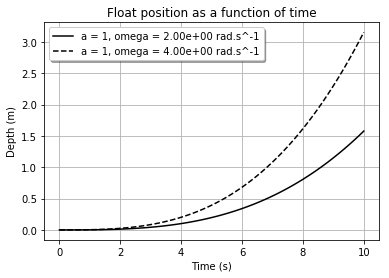

In [10]:
''' Float position as a function of time, depending 
on the added mass (a) and the piston flow u '''

t = np.linspace(0,10,100)

"""
Parameters :
"""
#Omega = [12.4*2.*np.pi/360., 
#         (12.4*2.*np.pi/360. + 124.*2.*np.pi/360.)/2,
#         124.*2.*np.pi/360., 12.4*2.*np.pi/360., 
#         (12.4*2.*np.pi/360. + 124.*2.*np.pi/360.)/2,
#         124.*2.*np.pi/360., 12.4*2.*np.pi/360., 
#         (12.4*2.*np.pi/360. + 124.*2.*np.pi/360.)/2,
#         124.*2.*np.pi/360.]
#A = [1, 1, 1, 2, 2, 2, 0, 0, 0]

Omega = [2., 4.] #rotation speed of the piston
A = [1, 1] #added mass
S = ['k-', 'k--'] #ploting parameters

fig, ax = plt.subplots()
for o,a,s in zip(Omega,A,S):
    params['omega'] = o
    params['u'] = omega2dvdt(params['omega'], params['lead'], params['r_piston'])
    params['a'] = a
    if a == 0:
        color = 'green'
    elif a == 2:
        color = 'red'
    else: # a == 1
        color = 'black'
        
        
    ax.plot(t, zf(t, params), s, c = color,
            label='a = {}, omega = {:.2e} rad.s^-1'.format(params['a'], o))

ax.set_xlabel('Time (s)')
ax.set_ylabel('Depth (m)')
ax.set_title('Float position as a function of time')
ax.grid()
legend = ax.legend(loc='best', shadow=True, fontsize='medium')

### Float speed as a function of time

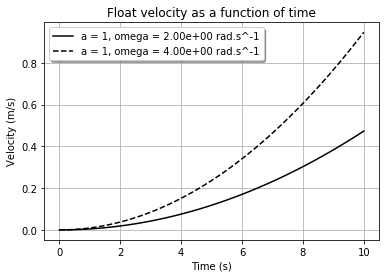

In [11]:
''' Float speed as a function of time, depending
on the added mass (a) and the piston flow u '''

fig, ax = plt.subplots()
for o,a,s in zip(Omega,A,S):
    params['omega'] = o
    params['u'] = omega2dvdt(params['omega'], params['lead'], params['r_piston'])
    params['a'] = a
    if a == 0:
        color = 'green'
    elif a == 2:
        color = 'red'
    else: # a == 1
        color = 'black'
        
    ax.plot(t, vf(t, params),s, c = color,
            label='a = {}, omega = {:.2e} rad.s^-1'.format(params['a'], o))

ax.set_xlabel('Time (s)')
ax.set_ylabel('Velocity (m/s)')
ax.set_title('Float velocity as a function of time')
ax.grid()
legend = ax.legend(loc='best', shadow=True, fontsize='medium')

---
### Necessary time for the float to reach a given speed (determination of $1/r$)

Let's admit that the float will not reach a vertical velocity upper than 0.10 m/s.

That is to say: $\nu$ should correspond to the following condition: 

$$
\begin{align}
\nu\pi/2 &= 0.10 m/s
\end{align}
$$

Thus 

$$
\begin{align}
\nu &= 0.06366197723675814 m/s
\end{align}
$$

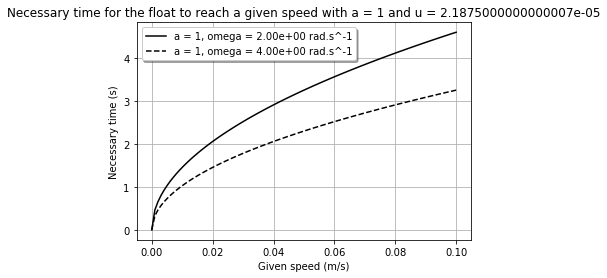

In [12]:
''' Necessary time for the float to reach a given speed '''

v = np.linspace(0, 0.1,100)

fig, ax = plt.subplots()
for o,a,s in zip(Omega,A,S):
    params['omega'] = o
    params['u'] = omega2dvdt(params['omega'], params['lead'], params['r_piston'])
    params['a'] = a
    if a == 0:
        color = 'green'
    elif a == 2:
        color = 'red'
    else: # a == 1
        color = 'black'
        
    ax.plot(v, tv(v, params),s, c = color,
            label='a = {}, omega = {:.2e} rad.s^-1'.format(params['a'], o))
ax.set_xlabel('Given speed (m/s)')
ax.set_ylabel('Necessary time (s)')
ax.set_title('Necessary time for the float to reach a given speed with a = {} and u = {}'.format(params['a'], params['u']))
ax.grid()
legend = ax.legend(loc='best', shadow=True, fontsize='medium')

For a given speed of 0.10 m/s, an added mass of 1 and a rotation rate of 4.00 rad/s, we have 1/r = 3.25 s, hence r = 0.31 $s^{-1}$

---
### Necessary depth for the float to reach a given speed (determination of $\delta$)


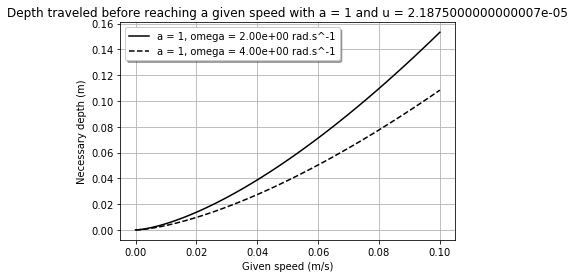

In [13]:
''' Necessary depth for the float to reach a given speed '''

fig, ax = plt.subplots()
for o,a,s in zip(Omega,A,S):
    params['omega'] = o
    params['u'] = omega2dvdt(params['omega'], params['lead'], params['r_piston'])
    params['a'] = a
    if a == 0:
        color = 'green'
    elif a == 2:
        color = 'red'
    else: # a == 1
        color = 'black'
        
    ax.plot(v, zv(v, params),s, c = color,
            label='a = {}, omega = {:.2e} rad.s^-1'.format(params['a'], o))
ax.set_xlabel('Given speed (m/s)')
ax.set_ylabel('Necessary depth (m)')
ax.set_title('Depth traveled before reaching a given speed with a = {} and u = {}'.format(params['a'], params['u']))
ax.grid()
legend = ax.legend(loc='best', shadow=True, fontsize='medium')

For a given speed of 0.10 m/s, an added mass of 1 and a rotation rate of 4.00 rad/s, we have $\delta$ = 0.11 m